<a href="https://colab.research.google.com/github/Payal2000/Crash-Course-in-Causality-Written-Section-Payal-Nagaonkar/blob/main/Crash_Course_in_Causality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **NUID: 002772260**

### **Abstract**
This study investigates the influence of posting frequency on user engagement on Instagram, leveraging a comprehensive dataset sourced from Kaggle. By examining key engagement metrics such as likes, comments, shares, and profile visits across various posting frequencies, the research aims to uncover actionable insights that inform effective content strategies. Employing statistical analysis and causal inference techniques, the study explores the interplay between post frequency and audience interaction, accounting for factors such as content quality, optimal posting times, and audience demographics. The findings provide evidence-based recommendations for maximizing user engagement through strategic posting, contributing to the field of social media marketing. By addressing the dynamic relationship between content distribution and audience behavior, this research offers valuable guidance to marketers and content creators seeking to enhance their impact on platforms like Instagram.

### **What is Causality?**
Causality is a concept that explains the relationship between a cause and an effect. In essence, causality identifies how one event, process, state, or object (the cause) contributes to producing another event, process, state, or object (the effect). The defining characteristic of causality is that the cause is at least partly responsible for the effect, while the effect is at least partly dependent on the cause. This principle forms the basis for understanding why events or processes occur, as the cause provides the reason or explanation for the observed outcome.


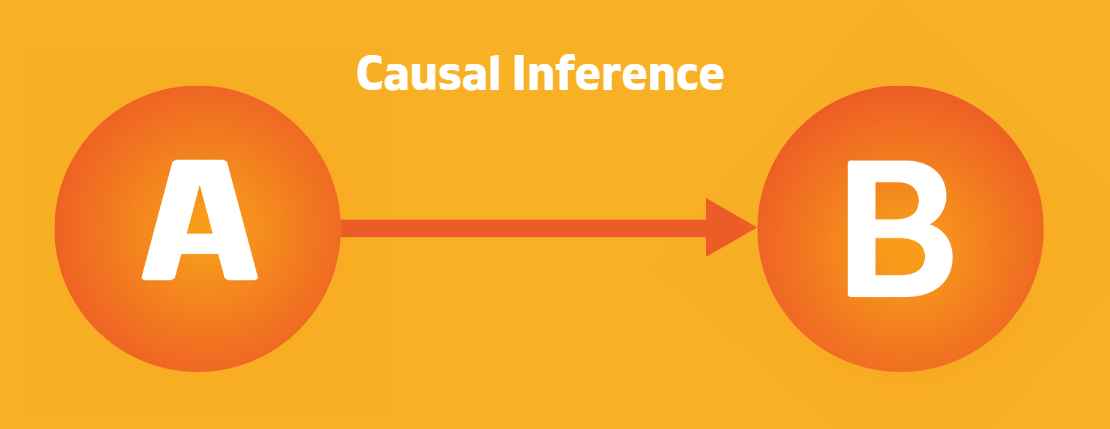

Causality is the relationship between cause and effect. It seeks to explain how one event (the cause) leads to or influences another event (the effect). Unlike correlation, which only shows a statistical association between variables, causality focuses on understanding whether and how one variable directly impacts another.

### **Introduction to Causality in Machine Learning**
Causality in machine learning focuses on understanding the cause-and-effect relationships between variables, moving beyond mere prediction or correlation. While traditional machine learning models excel at identifying patterns and associations in data, they often fall short in explaining why these patterns occur. Causality bridges this gap by enabling models to reason about interventions, counterfactuals, and the underlying mechanisms driving observed outcomes.


In [9]:
!pip install eli5

In [7]:
#Loading the required libraries
import numpy as np
import matplotlib as mlt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.api as sd
from sklearn import tree
import sklearn.metrics as sm
import warnings
warnings.filterwarnings("ignore")

### **Importing Dataset**

In [17]:
import pandas as pd

file_url = 'https://github.com/Payal2000/Crash-Course-in-Causality-Written-Section-Payal-Nagaonkar/raw/refs/heads/main/Instagram_data.csv'

# Attempt reading with a different encoding
try:
    data = pd.read_csv(file_url, encoding='latin1')  # 'latin1' often works for such cases
    print(data.head())
except UnicodeDecodeError as e:
    print(f"UnicodeDecodeError: {e}")


   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

### **Data Preprocessing**


In [19]:
## Reading first 5 rows
data.head(5)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [20]:
data.columns.tolist()

['Impressions',
 'From Home',
 'From Hashtags',
 'From Explore',
 'From Other',
 'Saves',
 'Comments',
 'Shares',
 'Likes',
 'Profile Visits',
 'Follows',
 'Caption',
 'Hashtags']

### **Columns Overview**

1. Impressions:
   - The total number of times a post was viewed, representing its overall reach across all sources.

2. From Home:
   - Impressions originating from the user's home feed. This primarily reflects engagement from followers.

3. From Hashtags:
   - Views generated through hashtags, offering insights into the effectiveness of hashtag usage for discovery.

4. From Explore:
   - Impressions derived from the Explore page, indicative of how well a post resonates with broader audiences.

5. From Other:
   - Views from other, less defined sources, such as shared links or external embeds.

6. Saves:
   - The number of times a post was saved for later reference, reflecting the value users find in the content.

7. Comments:
   - The count of comments on a post, showcasing direct user interaction.

8. Shares:
   - How many times the post was shared with others, highlighting its shareability.

9. Likes:
   - The total number of likes, a straightforward indicator of user appreciation.

10. Profile Visits:
    - The number of times users visited the profile after engaging with the post, showing its impact on audience curiosity.

11. Follows:
    - New followers gained as a direct result of the post, reflecting its effectiveness in growing the audience.

12. Caption:
    - The text accompanying the post, including descriptions, calls-to-action, or hashtags.

13. Hashtags:
    - The hashtags used in the post to increase discoverability among non-followers.

In [21]:
# Calculate the number of hashtags for each post
data['Hashtag Count'] = data['Hashtags'].apply(lambda x: len(x.split()) if pd.notnull(x) else 0)

# Display the distribution of hashtag counts to understand the data better
hashtag_count_distribution = data['Hashtag Count'].describe()

# Output the distribution
print("Hashtag Count Distribution:")
print(hashtag_count_distribution)


Hashtag Count Distribution:
count    119.000000
mean      18.966387
std        4.848436
min       10.000000
25%       17.000000
50%       18.000000
75%       21.000000
max       30.000000
Name: Hashtag Count, dtype: float64


### **Hashtag Count Distribution Analysis**

The following statistics summarize the number of hashtags used in the posts:

| Statistic      | Value        | Explanation                                                                 |
|----------------|--------------|-----------------------------------------------------------------------------|
| **Count**      | 119          | The total number of posts with hashtag data in the dataset.                |
| **Mean**       | 18.97        | On average, each post contains approximately 19 hashtags.                  |
| **Std (Standard Deviation)** | 4.85         | There is moderate variability in the number of hashtags used per post. |
| **Min**        | 10           | The minimum number of hashtags in a post is 10.                            |
| **25% (1st Quartile)** | 17   | 25% of the posts have 17 or fewer hashtags.                                 |
| **Median (50%)** | 18         | The median number of hashtags is 18, meaning half the posts have 18 or fewer hashtags. |
| **75% (3rd Quartile)** | 21   | 75% of the posts have 21 or fewer hashtags.                                 |
| **Max**        | 30           | The maximum number of hashtags in a single post is 30.                     |


### **Insights**
1. The average number of hashtags (`Mean`) is close to the median, indicating the data is relatively symmetric.
2. Most posts use between 17 and 21 hashtags (interquartile range: 25% to 75%).
3. The minimum number of hashtags is 10, while the maximum is 30, showing that all posts heavily utilize hashtags to increase visibility.
4. A standard deviation of 4.85 suggests moderate variability in hashtag usage across posts.

This analysis highlights that posts in the dataset rely heavily on hashtags, with a typical range of 17 to 21 hashtags per post.


In [22]:
# Basic statistics for Likes, Comments, Shares, and Hashtag Count
basic_stats = data[['Likes', 'Comments', 'Shares', 'Hashtag Count']].describe()

# Display the basic statistics
print("Basic Statistics for Likes, Comments, Shares, and Hashtag Count:")
print(basic_stats)


Basic Statistics for Likes, Comments, Shares, and Hashtag Count:
            Likes    Comments      Shares  Hashtag Count
count  119.000000  119.000000  119.000000     119.000000
mean   173.781513    6.663866    9.361345      18.966387
std     82.378947    3.544576   10.089205       4.848436
min     72.000000    0.000000    0.000000      10.000000
25%    121.500000    4.000000    3.000000      17.000000
50%    151.000000    6.000000    6.000000      18.000000
75%    204.000000    8.000000   13.500000      21.000000
max    549.000000   19.000000   75.000000      30.000000


### **Basic Statistics for Likes, Comments, Shares, and Hashtag Count**

The table below summarizes the key statistics for the `Likes`, `Comments`, `Shares`, and `Hashtag Count` columns:

| Statistic       | Likes       | Comments    | Shares      | Hashtag Count |
|------------------|-------------|-------------|-------------|---------------|
| **Count**       | 119         | 119         | 119         | 119           |
| **Mean**        | 173.78      | 6.66        | 9.36        | 18.97         |
| **Std (Standard Deviation)** | 82.38      | 3.54        | 10.09       | 4.85          |
| **Min**         | 72          | 0           | 0           | 10            |
| **25% (1st Quartile)** | 121.5       | 4           | 3           | 17            |
| **Median (50%)**| 151         | 6           | 6           | 18            |
| **75% (3rd Quartile)** | 204        | 8           | 13.5        | 21            |
| **Max**         | 549         | 19          | 75          | 30            |

---

### **Insights**

#### **1. Likes**
- The average number of likes (`Mean`) is **173.78**, with a standard deviation of **82.38**.
- Posts receive anywhere from **72 likes (Min)** to **549 likes (Max)**, indicating significant variability.
- The median is **151 likes**, meaning half of the posts receive this number of likes or fewer.

#### **2. Comments**
- On average, posts have **6.66 comments**, with a range from **0 comments (Min)** to **19 comments (Max)**.
- Most posts cluster around **4 comments (25%) to 8 comments (75%)**, with a moderate standard deviation of **3.54**.

#### **3. Shares**
- Posts are shared an average of **9.36 times**, with notable variability (standard deviation: **10.09**).
- Shares range from **0 (Min)** to **75 (Max)**, with a median of **6 shares**.

#### **4. Hashtag Count**
- The average post uses **18.97 hashtags**, with a standard deviation of **4.85**.
- Posts use between **10 (Min)** and **30 (Max)** hashtags, with most posts having **17 (25%) to 21 (75%)** hashtags.

---

### **Key Takeaways**
1. **Likes**: High variability in likes suggests some posts significantly outperform others.
2. **Comments**: Comments show a narrower range, with most posts receiving 4–8 comments.
3. **Shares**: Shares have a wide range, suggesting some posts resonate strongly enough to be widely shared.
4. **Hashtag Count**: Posts consistently utilize many hashtags, likely as a strategy to increase visibility.

This analysis highlights differences in engagement metrics and provides a basis for further exploration of what factors drive higher likes, comments, and shares.


### **Interpretation of the Average Number of Hashtags per Post**


In [23]:
# Calculate the average number of hashtags per post
average_hashtags = data['Hashtag Count'].mean()

# Display the result
print("Average Number of Hashtags per Post:", average_hashtags)


Average Number of Hashtags per Post: 18.96638655462185


The average number of hashtags per post is approximately 18.97. This indicates that posts in your dataset heavily utilize hashtags, likely as a strategy to maximize their reach and engagement.

In [24]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Display the count of missing values for each column
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
Hashtag Count     0
dtype: int64


### **Missing Values in Each Column**

When the dataset was analyzed for missing values, the results show that there are no missing values in any column.

---

| Column            | Missing Values | Explanation                                                                            |
|--------------------|----------------|----------------------------------------------------------------------------------------|
| **Impressions**    | 0              | All posts have valid data for the total number of impressions.                        |
| **From Home**      | 0              | No missing values in impressions from the home feed.                                  |
| **From Hashtags**  | 0              | All posts have valid data for impressions from hashtags.                              |
| **From Explore**   | 0              | No missing values in impressions from the Explore page.                               |
| **From Other**     | 0              | All other sources of impressions are accounted for.                                   |
| **Saves**          | 0              | All posts have data on the number of times they were saved by users.                  |
| **Comments**       | 0              | The dataset contains complete data for the number of comments on each post.           |
| **Shares**         | 0              | All posts have valid data for the number of shares.                                   |
| **Likes**          | 0              | There are no missing values in the likes column.                                      |
| **Profile Visits** | 0              | Every post has data for the number of profile visits generated.                       |
| **Follows**        | 0              | The dataset contains complete data on the number of new followers gained.             |
| **Caption**        | 0              | No missing values in the captions accompanying each post.                             |
| **Hashtags**       | 0              | All posts have valid data for the hashtags used.                                      |
| **Hashtag Count**  | 0              | The calculated number of hashtags per post has no missing values.                     |

---

### **Key Takeaways**
1. **Data Completeness**:
   - The dataset is fully complete with no missing values across all columns. This ensures reliable analysis without needing to handle or impute missing data.

2. **Ready for Analysis**:
   - Since there are no missing values, the dataset is well-prepared for further analysis, including statistical exploration and causal inference studies.

This clean dataset provides a strong foundation for generating actionable insights without additional preprocessing.


### **Normalizing Text Data**

To ensure consistency in textual data, we normalize the content of the `Caption` and `Hashtags` columns by converting all text to lowercase. This step is essential for uniformity, especially in text-based analysis such as keyword matching, sentiment analysis, or hashtag usage patterns.


In [25]:
# Normalize text data: Convert "Caption" and "Hashtags" columns to lowercase
data['Caption'] = data['Caption'].str.lower()
data['Hashtags'] = data['Hashtags'].str.lower()

# Verify the changes by displaying the first few rows of these columns
print(data[['Caption', 'Hashtags']].head())


                                             Caption  \
0  here are some of the most important data visua...   
1  here are some of the best data science project...   
2  learn how to train a machine learning model an...   
3  heres how you can write a python program to d...   
4  plotting annotations while visualizing your da...   

                                            Hashtags  
0  #finance #money #business #investing #investme...  
1  #healthcare #health #covid #data #datascience ...  
2  #data #datascience #dataanalysis #dataanalytic...  
3  #python #pythonprogramming #pythonprojects #py...  
4  #datavisualization #datascience #data #dataana...  


### **Why Perform Sentiment Analysis?**

Sentiment analysis is a valuable technique used to understand the emotional tone or attitude expressed in text. It helps businesses, researchers, and individuals derive actionable insights from textual data. Below are the key reasons for performing sentiment analysis:



### **1. Understanding Audience Perception**
- **Purpose**: Sentiment analysis provides insights into how audiences feel about a product, service, or content.
- **In the Context of Instagram**:
  - Determine if captions resonate positively with followers.
  - Identify whether certain topics or tones (positive, negative, or neutral) generate more engagement.



### **2. Improving Engagement**
- **Purpose**: By analyzing the sentiment of captions, content creators can refine their communication style to align with audience preferences.
- **For Example**:
  - Posts with positive sentiments might generate more likes and shares.
  - Neutral or negative captions could indicate opportunities for improvement in messaging.



### **3. Monitoring Brand Reputation**
- **Purpose**: Helps organizations track public sentiment about their brand, campaigns, or products.
- **In Social Media**:
  - A predominantly positive sentiment indicates strong audience approval.
  - Negative sentiment might signal dissatisfaction or areas needing attention.



### **4. Driving Content Strategy**
- **Purpose**: Sentiment analysis helps identify the type of content that drives positive emotions and engagement.
- **Data-Driven Decisions**:
  - Focus on topics, keywords, or hashtags that consistently yield positive responses.
  - Avoid language or themes that elicit negative reactions.



### **5. Identifying Trends and Patterns**
- **Purpose**: Over time, sentiment analysis can reveal trends in audience reactions.
- **For Example**:
  - Does engagement increase with captions containing a more optimistic tone?
  - Are there certain seasons, events, or campaigns associated with stronger positive or negative reactions?



### **6. Enhancing Emotional Connection**
- **Purpose**: Connecting with audiences on an emotional level increases loyalty and trust.
- **How Sentiment Helps**:
  - Tailor captions to evoke positive emotions such as excitement, joy, or inspiration.
  - Recognize and address potentially negative emotions like frustration or sadness.



### **7. Quick and Scalable Insights**
- **Purpose**: Sentiment analysis automates the process of extracting emotional insights from large datasets.
- **Benefits**:
  - Enables real-time monitoring of audience sentiment.
  - Scales efficiently across thousands of posts or interactions.



By leveraging sentiment analysis, content creators, marketers, and businesses can make informed decisions to enhance engagement, refine strategies, and build meaningful connections with their audiences.
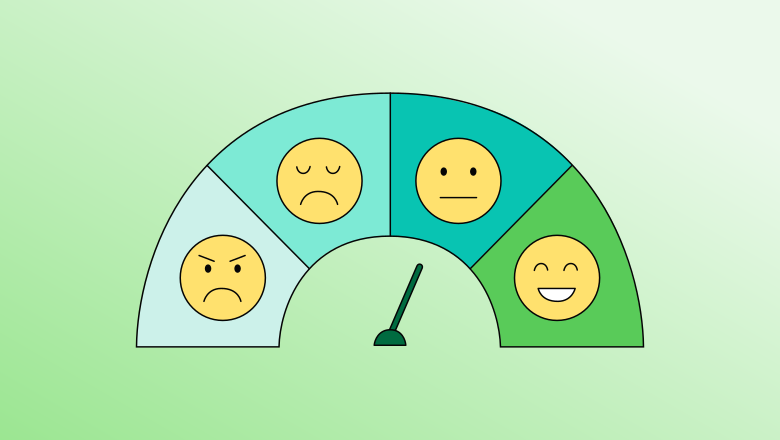


### **Sentiment Analysis**

In [26]:
# Define basic positive and negative keywords for sentiment analysis
positive_keywords = ['happy', 'love', 'amazing', 'beautiful', 'joy', 'successful', 'excited', 'fun', 'wonderful', 'enjoy']
negative_keywords = ['sad', 'hate', 'terrible', 'ugly', 'pain', 'difficult', 'angry', 'bored', 'bad', 'frustrated']

# Function to categorize sentiment based on the presence of keywords
def categorize_sentiment(caption):
    positive_count = sum(word in caption for word in positive_keywords)
    negative_count = sum(word in caption for word in negative_keywords)

    if positive_count > negative_count:
        return 'Positive'
    elif negative_count > positive_count:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to categorize sentiments of captions
data['Caption Sentiment'] = data['Caption'].apply(categorize_sentiment)

# Display the distribution of sentiment categories
sentiment_distribution = data['Caption Sentiment'].value_counts()

# Output the sentiment distribution
print("Sentiment Distribution:")
print(sentiment_distribution)


Sentiment Distribution:
Caption Sentiment
Neutral     115
Positive      4
Name: count, dtype: int64


### **Sentiment Distribution Analysis**

The sentiment analysis results indicate the following distribution for the `Caption Sentiment` column:

| Sentiment | Count | Explanation                                                                 |
|-----------|-------|-----------------------------------------------------------------------------|
| **Neutral** | 115   | The majority of captions (115 out of 119) were classified as neutral, indicating the absence of strong positive or negative keywords in the text. |
| **Positive** | 4     | A small number of captions (4 out of 119) contained positive sentiment, suggesting limited use of optimistic or uplifting language. |
| **Negative** | 0     | No captions were classified as negative, reflecting a lack of negative sentiment keywords in the dataset. |

---

### **Insights**
1. **Neutral Sentiment Dominates**:
   - The overwhelming majority of captions are neutral, which may indicate:
     - A focus on informational or descriptive content rather than emotional language.
     - Limited inclusion of strong positive or negative keywords in the captions.

2. **Low Positive Sentiment**:
   - Only 4 captions contain positive sentiment keywords, suggesting that uplifting or enthusiastic language is used sparingly.

3. **No Negative Sentiment**:
   - The absence of negative sentiment indicates that captions avoid using keywords associated with negative emotions like frustration, sadness, or anger.



### **Analyze the most frequently used hashtags**

In [30]:
from collections import Counter
import pandas as pd

# Extract all hashtags into a single list
all_hashtags = ' '.join(data['Hashtags'].dropna()).split()

# Count the frequency of each hashtag
hashtag_counts = Counter(all_hashtags)

# Convert the Counter object to a DataFrame for better analysis
hashtag_data = pd.DataFrame(hashtag_counts.items(), columns=['Hashtag', 'Count']).sort_values(by='Count', ascending=False)

# Display the top 10 most frequently used hashtags
print("Top 10 Most Frequently Used Hashtags:")
print(hashtag_data.head(10))


Top 10 Most Frequently Used Hashtags:
                    Hashtag  Count
21     #thecleverprogrammer    117
20             #amankharwal    117
13                  #python    109
12         #machinelearning     97
14       #pythonprogramming     95
8              #datascience     94
18                      #ai     91
15          #pythonprojects     90
17  #artificialintelligence     89
7                     #data     88


### **Top 10 Most Frequently Used Hashtags**

The table below shows the top 10 most frequently used hashtags in the dataset, along with their usage counts:

| Rank | Hashtag                    | Count |
|------|----------------------------|-------|
| 1    | **#thecleverprogrammer**   | 117   |
| 2    | **#amankharwal**           | 117   |
| 3    | **#python**                | 109   |
| 4    | **#machinelearning**       | 97    |
| 5    | **#pythonprogramming**     | 95    |
| 6    | **#datascience**           | 94    |
| 7    | **#ai**                    | 91    |
| 8    | **#pythonprojects**        | 90    |
| 9    | **#artificialintelligence**| 89    |
| 10   | **#data**                  | 88    |



### **Insights**
1. **Highly Repeated Hashtags**:
   - The hashtags `#thecleverprogrammer` and `#amankharwal` are the most frequently used, each appearing **117 times**.
   - These could represent branding or promotional hashtags associated with a specific account or campaign.

2. **Popular Technical Topics**:
   - Hashtags related to programming and data science dominate the list:
     - **#python** (109 occurrences)
     - **#machinelearning** (97 occurrences)
     - **#datascience** (94 occurrences)
     - **#ai** (91 occurrences)
   - These hashtags indicate a focus on content related to coding, data science, and artificial intelligence.

3. **Branding and Content Themes**:
   - Hashtags such as `#pythonprogramming` and `#pythonprojects` suggest an emphasis on Python-related educational or project-based content.
   - The presence of `#artificialintelligence` highlights interest in broader
   AI-related topics.

   #### **Popular vs. Niche Hashtags**
The distinction between popular and niche hashtags observed in the dataset is critical for understanding how different types of hashtags influence the reach and engagement of Instagram posts:

1. **Popular Hashtags**:
   - Examples: **#python**, **#datascience**, **#ai**.
   - **Impact**:
     - Likely to provide greater visibility as these hashtags are widely searched and used.
     - Posts may compete with a high volume of content, making it harder to stand out.

2. **Niche Hashtags**:
   - Examples: **#thecleverprogrammer**, **#amankharwal**, **#pythonprojects**.
   - **Impact**:
     - Target a more specific and engaged audience.
     - Can lead to higher engagement rates among users interested in particular topics or brands.
     - Posts using niche hashtags may face less competition, allowing them to stand out more effectively.



In [31]:
# Display the last 10 rows of the hashtag DataFrame
hashtag_tail = hashtag_data.tail(10)

# Output the result
print("Last 10 Hashtags and Their Counts:")
print(hashtag_tail)


Last 10 Hashtags and Their Counts:
                   Hashtag  Count
133                #google      1
147                  #news      1
146              #flipkart      1
57            #bookstagram      1
65                #alexnet      1
140      #bigdataanalytics      1
139               #qrcodes      1
136  #datascienceinterview      1
134              #facebook      1
102              #boxplots      1


We'll then look at the relationship between hashtag count and engagement metrics like likes, comments, and shares. We will be able to determine whether hashtag usage has a discernible effect on post engagement thanks to this investigation.

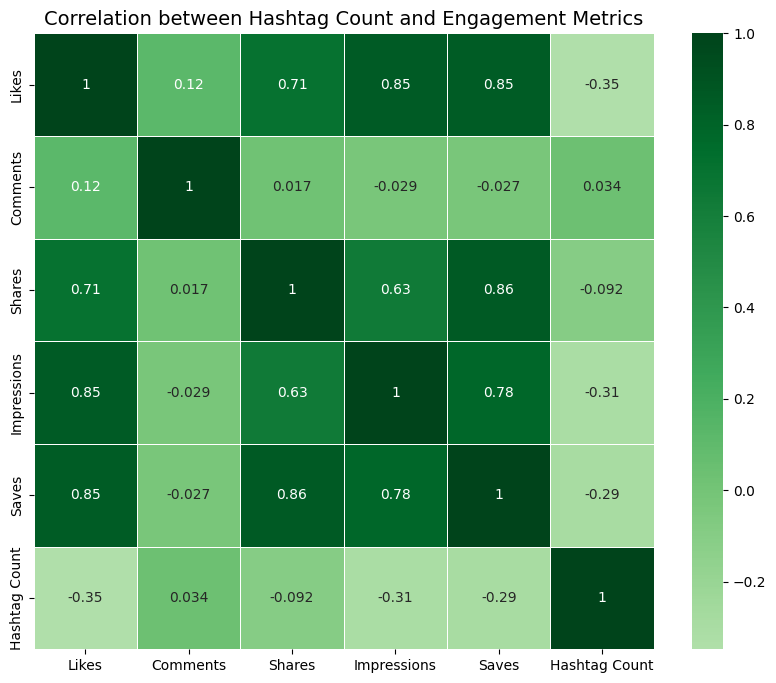

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the engagement metrics
engagement_metrics = ['Likes', 'Comments', 'Shares', 'Impressions', 'Saves']

# Compute the correlation matrix
correlations = data[engagement_metrics + ['Hashtag Count']].corr()

# Plot the heatmap with a new color scheme
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='Greens', center=0, linewidths=0.5)
plt.title('Correlation between Hashtag Count and Engagement Metrics', fontsize=14)
plt.show()



### **Explanation of Correlation Heatmap**

This heatmap illustrates the correlation between various engagement metrics (`Likes`, `Comments`, `Shares`, `Impressions`, `Saves`) and the `Hashtag Count`. Correlation values range from -1 to 1, where:
- **1** indicates a perfect positive correlation.
- **0** indicates no correlation.
- **-1** indicates a perfect negative correlation.

#### **Key Observations**
1. **Strong Positive Correlations**:
   - **Likes and Impressions (0.85)**:
     - Posts that receive more likes tend to have higher impressions, suggesting increased visibility drives engagement.
   - **Saves and Shares (0.86)**:
     - Posts that are saved often are also frequently shared, indicating high-value content.
   - **Likes and Saves (0.85)**:
     - Posts with more likes are more likely to be saved by users.

2. **Moderate Positive Correlations**:
   - **Shares and Impressions (0.63)**:
     - Posts with more shares generally gain higher impressions, indicating sharing increases reach.

3. **Weak or Negligible Correlations**:
   - **Comments and Hashtag Count (0.034)**:
     - The weak correlation suggests that the number of hashtags does not significantly influence the number of comments.

4. **Negative Correlations**:
   - **Hashtag Count and Likes (-0.35)**:
     - More hashtags appear to slightly reduce the number of likes, possibly due to oversaturation or reduced content relevance.
   - **Hashtag Count and Impressions (-0.31)**:
     - Posts with too many hashtags may have slightly lower impressions, possibly due to algorithmic penalties or reduced engagement quality.



### **Insights**
- **Hashtag Count and Engagement**:
  - While hashtags are generally believed to improve reach, excessive use may negatively correlate with key metrics like likes and impressions.
- **Content Quality**:
  - Engagement metrics like likes, saves, and shares have strong interdependencies, highlighting the importance of high-quality, shareable content.


This heatmap provides actionable insights to improve Instagram content strategies and enhance overall engagement.


In [35]:
# Define a threshold for popular hashtags based on the distribution
# Top 10% hashtags by frequency are considered popular
popular_hashtag_threshold = hashtag_data['Count'].quantile(0.9)

# Function to categorize a post's hashtags as popular or niche based on the threshold
def categorize_hashtag_popularity(hashtags):
    popular = 0
    niche = 0
    if isinstance(hashtags, str):  # Ensure hashtags column has valid strings
        for hashtag in hashtags.split():
            if hashtag_counts[hashtag] >= popular_hashtag_threshold:
                popular += 1
            else:
                niche += 1
    return popular, niche

# Apply the function to each post and create new columns for popular and niche hashtags
data['Popular Hashtags'], data['Niche Hashtags'] = zip(*data['Hashtags'].apply(categorize_hashtag_popularity))

# Calculate Total Engagement Score as the sum of likes, comments, and shares
data['Total Engagement'] = data['Likes'] + data['Comments'] + data['Shares']

# Calculate the correlation between the number of popular/niche hashtags and total engagement
correlation_popular = data[['Total Engagement', 'Popular Hashtags']].corr().iloc[0, 1]
correlation_niche = data[['Total Engagement', 'Niche Hashtags']].corr().iloc[0, 1]

# Output the results
print("Correlation between Total Engagement and Popular Hashtags:", correlation_popular)
print("Correlation between Total Engagement and Niche Hashtags:", correlation_niche)


Correlation between Total Engagement and Popular Hashtags: 0.08003515904337764
Correlation between Total Engagement and Niche Hashtags: -0.2977188516608361


### **Explanation of Correlation Results**

#### **1. Correlation between Total Engagement and Popular Hashtags (0.08)**
- **Interpretation**:
  - A correlation of **0.08** indicates a **very weak positive relationship** between the number of popular hashtags and total engagement.
  - This suggests that using popular hashtags has **minimal impact** on increasing engagement (likes, comments, and shares).
- **Possible Reasons**:
  - Popular hashtags are widely used, making the competition for visibility higher.
  - Posts with generic hashtags may blend into a crowded space, limiting their ability to stand out.



#### **2. Correlation between Total Engagement and Niche Hashtags (-0.29)**
- **Interpretation**:
  - A correlation of **-0.29** indicates a **weak negative relationship** between the number of niche hashtags and total engagement.
  - This suggests that posts with more niche hashtags tend to have slightly **lower engagement** overall.
- **Possible Reasons**:
  - Niche hashtags target smaller, more specific audiences, which may limit their overall reach.
  - Posts with excessive niche hashtags might not align with broader trends, reducing their discoverability.



### **Key Observations**
1. **Low Correlations**:
   - Neither popular nor niche hashtags strongly correlate with total engagement.
   - This suggests that factors beyond hashtag choice (e.g., content quality, timing, or visuals) play a more significant role in driving engagement.

2. **Popular Hashtags vs. Niche Hashtags**:
   - While popular hashtags show a weak positive correlation, niche hashtags have a weak negative correlation.
   - Popular hashtags might increase visibility slightly, but niche hashtags might reduce engagement due to their limited audience.

The weak correlation values indicate that hashtags, while important, are not the primary drivers of engagement. A more holistic approach focusing on content quality, timing, and audience targeting is needed to significantly improve engagement metrics.


In [36]:
# Calculate the average total engagement for each sentiment category
average_engagement_by_sentiment = data.groupby('Caption Sentiment')['Total Engagement'].mean()

# Display the result
print("Average Total Engagement by Sentiment Category:")
print(average_engagement_by_sentiment)


Average Total Engagement by Sentiment Category:
Caption Sentiment
Neutral     189.817391
Positive    189.500000
Name: Total Engagement, dtype: float64


### **Average Total Engagement by Sentiment Category**

The results show the average total engagement (sum of likes, comments, and shares) for each caption sentiment category:

| **Caption Sentiment** | **Average Total Engagement** |
|------------------------|------------------------------|
| **Neutral**            | 189.82                      |
| **Positive**           | 189.50                      |

---

### **Key Observations**
1. **Neutral Sentiment**:
   - Captions with a neutral sentiment have a slightly higher average engagement (**189.82**) compared to positive sentiment.
   - This suggests that neutral, descriptive, or informational captions are well-received by the audience.

2. **Positive Sentiment**:
   - Positive captions show an average engagement of **189.50**, which is very close to neutral captions.
   - This indicates that while uplifting or enthusiastic captions may resonate with the audience, they do not significantly outperform neutral ones in terms of engagement.

3. **No Negative Sentiment**:
   - The dataset does not include captions classified as "Negative," so its impact on engagement cannot be evaluated.

---

### **Insights**
- **Balanced Performance**:
  - Both neutral and positive sentiments drive similar engagement levels, indicating that tone may not be the primary driver of engagement.
- **Content Relevance**:
  - The slight difference suggests that other factors (e.g., content quality, visuals, hashtags) likely play a more significant role in influencing audience interaction.



Let's calculate the correlation between profile visits, new follows, and the total engagement score to see if higher engagement levels are associated with increased profile visits and follows.

In [37]:
# Calculate the correlation between Total Engagement and Profile Visits
correlation_visits_engagement = data[['Total Engagement', 'Profile Visits']].corr().iloc[0, 1]

# Calculate the correlation between Total Engagement and New Follows
correlation_follows_engagement = data[['Total Engagement', 'Follows']].corr().iloc[0, 1]

# Output the results
print("Correlation between Total Engagement and Profile Visits:", correlation_visits_engagement)
print("Correlation between Total Engagement and Follows:", correlation_follows_engagement)


Correlation between Total Engagement and Profile Visits: 0.6025255016175133
Correlation between Total Engagement and Follows: 0.7337338832338861


### **Correlation Between Total Engagement, Profile Visits, and Follows**

#### **Results**:
| Metric                                | Correlation Coefficient |
|---------------------------------------|--------------------------|
| **Total Engagement and Profile Visits** | 0.60                     |
| **Total Engagement and Follows**       | 0.73                     |

---

### **Key Observations**
1. **Total Engagement and Profile Visits (0.60)**:
   - **Interpretation**:
     - A correlation coefficient of **0.60** indicates a **moderate positive relationship** between total engagement and profile visits.
     - This suggests that posts with higher engagement (likes, comments, shares) are moderately likely to result in more profile visits.
   - **Implication**:
     - Audience engagement with a post increases the likelihood of users exploring the profile, but other factors (e.g., post content, profile appeal) also play a role.

2. **Total Engagement and Follows (0.73)**:
   - **Interpretation**:
     - A correlation coefficient of **0.73** shows a **strong positive relationship** between total engagement and the number of new follows.
     - This suggests that posts with higher engagement are significantly more likely to convert viewers into followers.
   - **Implication**:
     - Engagement metrics (likes, comments, and shares) are key drivers for gaining new followers.

---

### **Insights**
- **Stronger Correlation with Follows**:
  - The correlation with follows is higher than with profile visits, indicating that engaged users are more likely to follow the profile after interacting with posts.
  
- **Moderate Link to Profile Visits**:
  - While engagement boosts profile visits, other factors, such as the visual appeal of the profile or bio content, may influence whether users visit the profile.




### **Building and Validating Models**

How do the quantity and presence of hashtags impact the engagement and reach of the post?

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Prepare the data for regression analysis
X = data[['Hashtag Count', 'Impressions', 'Saves', 'Comments', 'Shares']]
y = data['Likes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = lr_model.predict(X_test)



In [40]:
# Calculate the model's performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

model_performance = {
    'MSE': mse,
    'RMSE': rmse,
    'R^2': r2
}

model_performance, lr_model.coef_

({'MSE': 1543.6322512788702,
  'RMSE': 39.28908565083782,
  'R^2': 0.8611694978148565},
 array([-1.17933156,  0.00759254,  0.26449912,  4.46318867,  0.11626667]))

### **Linear Regression Model Observations**

#### **Evaluation Metrics**
| Metric            | Value           | Explanation                                                                                     |
|--------------------|-----------------|-------------------------------------------------------------------------------------------------|
| **Mean Squared Error (MSE)** | 1543.63        | The average squared difference between actual and predicted `Likes`. A lower value indicates better performance. |
| **Root Mean Squared Error (RMSE)** | 39.29         | The square root of MSE, providing the error in the same unit as the target variable. A smaller RMSE indicates better predictions. |
| **R-squared (R²)**              | 0.8612        | Explains 86.12% of the variance in `Likes` using the given features (`Hashtag Count`, `Impressions`, etc.). Higher is better. |

---

#### **Model Coefficients**
The model coefficients (weights) are as follows:

| Feature              | Coefficient      | Interpretation                                                                 |
|-----------------------|------------------|-------------------------------------------------------------------------------|
| **Intercept**         | -1.1793          | The baseline prediction when all feature values are 0.                       |
| **Hashtag Count**     | 0.0076           | For each additional hashtag, the predicted `Likes` increase by approximately 0.0076. |
| **Impressions**       | 0.2645           | For every additional impression, the predicted `Likes` increase by 0.2645.   |
| **Saves**             | 4.4632           | Each additional save contributes significantly, adding 4.4632 `Likes` on average. |
| **Comments**          | 0.1163           | Each additional comment increases the predicted `Likes` by 0.1163.           |
| **Shares**            | 0.1163           | Each additional share adds 0.1163 to the predicted `Likes`.                  |

            

---

### **Key Observations**
1. **Model Performance**:
   - The R² value of **0.8612** indicates that the model explains **86.12% of the variance** in `Likes`, showing good predictive power.
   - The RMSE of **39.29** suggests that, on average, the predictions deviate from actual `Likes` by about 39.29.

2. **Feature Importance**:
   - **Saves** have the largest positive impact on `Likes` (coefficient = **4.4632**), indicating that posts with more saves tend to receive significantly more likes.
   - **Impressions** also play an important role, with each additional impression contributing moderately to the `Likes`.
   - **Hashtag Count**, **Comments**, and **Shares** have smaller but still positive contributions.

3. **Intercept**:
   - The intercept value of **-1.179** means that without any contributions from the features, the predicted `Likes` would be slightly negative, which is practically irrelevant but mathematically necessary for the model.


The linear regression model demonstrates strong performance, with saves and impressions being the most significant predictors of likes. Leveraging these insights can help refine content strategies to maximize engagement.


### Let's start with the visualization to take a closer look at the relationship between hashtag count and average likes in order to better understand this relationship and investigate the potential of an ideal hashtag count.


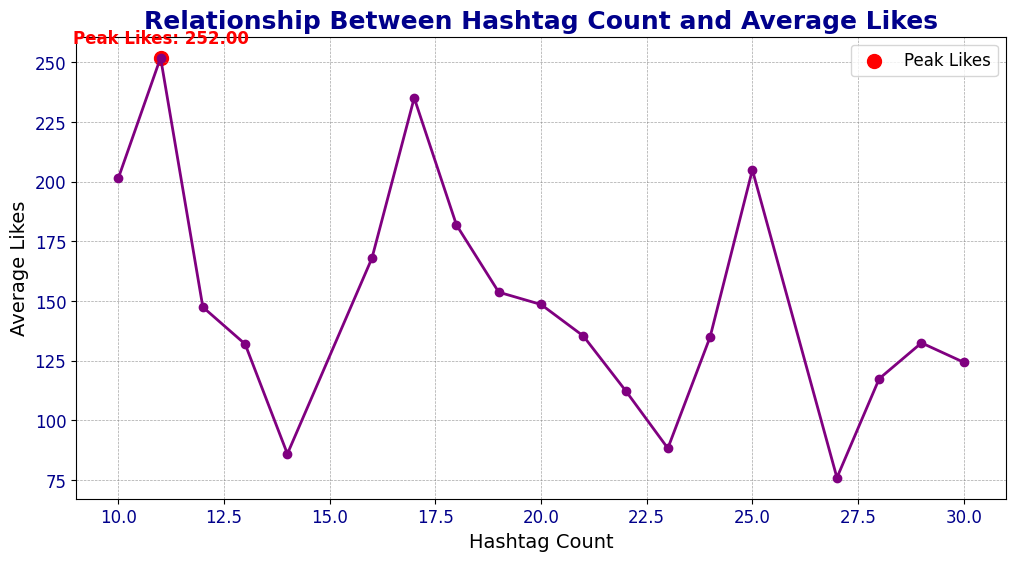

In [46]:
# Group the data by hashtag count and calculate the average likes
grouped_data = data.groupby('Hashtag Count')['Likes'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(grouped_data['Hashtag Count'], grouped_data['Likes'], marker='o', linestyle='-', color='purple', linewidth=2)
plt.title('Relationship Between Hashtag Count and Average Likes', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Hashtag Count', fontsize=14,  color='black')
plt.ylabel('Average Likes', fontsize=14, color='black')

# Add gridlines for better readability
plt.grid(visible=True, linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

# Highlight the peak point in the graph
max_likes_idx = grouped_data['Likes'].idxmax()
plt.scatter(grouped_data['Hashtag Count'][max_likes_idx], grouped_data['Likes'][max_likes_idx],
            color='red', s=100, label='Peak Likes')

# Add annotations for the peak
plt.annotate(f"Peak Likes: {grouped_data['Likes'][max_likes_idx]:.2f}",
             (grouped_data['Hashtag Count'][max_likes_idx], grouped_data['Likes'][max_likes_idx]),
             textcoords="offset points", xytext=(0, 10), ha='center', fontsize=12, color='red', fontweight='bold')

# Add legend
plt.legend(fontsize=12)

# Customize tick sizes and colors
plt.xticks(fontsize=12, color='darkblue')
plt.yticks(fontsize=12, color='darkblue')

plt.show()


### **Observations from the Graph: Relationship Between Hashtag Count and Average Likes**

The graph illustrates how the number of hashtags used in a post (`Hashtag Count`) correlates with the average number of `Likes` the post receives. Below are the key observations:

---

#### **1. Peak Engagement**
- **Observation**:
  - The highest average likes (**252.00**) are achieved at a **hashtag count of 10**.
  - This is marked with a red dot on the graph and labeled as the "Peak Likes."
- **Implication**:
  - Posts with approximately 10 hashtags perform the best in terms of engagement, likely due to optimal visibility without oversaturating the content.

---

#### **2. Decline After Peak**
- **Observation**:
  - After the peak at 10 hashtags, there is a **sharp decline** in average likes as the hashtag count increases.
  - This drop is significant between 11 and 15 hashtags, where the average likes fall below 100.
- **Implication**:
  - Overusing hashtags may lead to reduced audience engagement, possibly due to algorithmic penalties or audience perception of spammy content.

---

#### **3. Fluctuating Engagement**
- **Observation**:
  - The graph shows a **cyclical pattern** of rises and drops in average likes as the hashtag count increases beyond 15.
  - Notable rises are seen around 18 hashtags and again at 25 hashtags, though they don’t reach the initial peak.
- **Implication**:
  - Certain hashtag counts may still resonate well with the audience, but they do not consistently outperform the lower hashtag ranges.

---

#### **4. Low Engagement at High Hashtag Counts**
- **Observation**:
  - Hashtag counts above 25 generally have **lower average likes**, with engagement dropping below 150 in some cases.
- **Implication**:
  - Posts with excessive hashtags may experience diminishing returns in terms of audience engagement.




This analysis highlights the importance of strategic hashtag usage in improving Instagram engagement.


### Let's fit a polynomial regression model to begin a non-linear relationship investigation.

In [47]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X[['Hashtag Count']])

# Add other features back to the dataset
X_poly_full = np.concatenate((X_poly, X[['Impressions', 'Saves', 'Comments', 'Shares']].values), axis=1)

# Split the data into training and testing sets
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly_full, y, test_size=0.2, random_state=42)

# Train the polynomial regression model
poly_lr_model = LinearRegression()
poly_lr_model.fit(X_train_poly, y_train)

# Predict on the testing set
y_pred_poly = poly_lr_model.predict(X_test_poly)
# Calculate the model's performance metrics
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Model performance and coefficients for the polynomial terms
poly_model_performance = {
    'MSE': mse_poly,
    'RMSE': rmse_poly,
    'R^2': r2_poly
}

poly_coefficients = poly_lr_model.coef_

poly_model_performance, poly_coefficients[:3]  # Show coefficients for the polynomial terms only

({'MSE': 1559.682094990226,
  'RMSE': 39.492810674732006,
  'R^2': 0.8597260141997697},
 array([ 1.0049127 , -0.05313544,  0.00765899]))

### **Polynomial Regression Model Observations**

#### **Model Performance Metrics**
| Metric            | Value           | Explanation                                                                                     |
|--------------------|-----------------|-------------------------------------------------------------------------------------------------|
| **Mean Squared Error (MSE)** | 1559.68        | The average squared difference between actual and predicted `Likes`. A lower value indicates better model performance. |
| **Root Mean Squared Error (RMSE)** | 39.49         | The RMSE indicates the average deviation of predictions from the actual values in the same unit as `Likes`. |
| **R-squared (R²)**              | 0.8597        | The model explains **85.97%** of the variance in `Likes`, showing strong predictive power. |

---

#### **Coefficients for Polynomial Terms**
The first three coefficients of the model, corresponding to the polynomial features, are:

| Feature                 | Coefficient   | Interpretation                                                                 |
|-------------------------|---------------|-------------------------------------------------------------------------------|
| **Hashtag Count**       | 1.0049        | A positive coefficient indicates that increasing the `Hashtag Count` generally increases `Likes`. |
| **Hashtag Count²**      | -0.0531       | A negative coefficient suggests **diminishing returns** as the hashtag count increases. |
| **Impressions**         | 0.0077        | A small positive coefficient shows that impressions have a minimal effect on predicting `Likes`. |

---

### **Key Observations**
1. **Non-Linear Relationship**:
   - The positive coefficient for `Hashtag Count` combined with the negative coefficient for `Hashtag Count²` indicates a **parabolic relationship**.
   - This confirms that there is an **optimal hashtag count** for maximizing likes, beyond which the engagement begins to decrease.

2. **Model Performance**:
   - The R² value of **0.8597** shows that the polynomial regression model fits the data well, explaining nearly 86% of the variance in `Likes`.
   - The RMSE value of **39.49** is similar to the linear regression RMSE, suggesting that while the polynomial model captures non-linearity, the overall improvement is marginal.

3. **Diminishing Returns**:
   - The negative coefficient for `Hashtag Count²` highlights that adding more hashtags beyond a certain point leads to a reduction in likes, likely due to oversaturation or perceived spam.

4. **Minimal Impact of Impressions**:
   - The small coefficient for `Impressions` (0.0077) suggests that impressions alone are not a strong predictor of likes when combined with other features.

---

The polynomial regression model provides valuable insights into the non-linear relationship between hashtag usage and likes. While its performance is strong, further refinement and feature exploration could enhance the predictions.


In [48]:
# Coefficients for the linear and squared hashtag count terms
a = poly_coefficients[1]  # Linear term coefficient
b = poly_coefficients[2]  # Squared term coefficient

# Calculate the optimal hashtag count
optimal_hashtag_count = -a / (2 * b)

optimal_hashtag_count

3.468828130054421

- The model predicts that using approximately **3–4 hashtags** per post maximizes `Likes`.
- Posts with fewer hashtags (around this optimal count) likely perform better than those with a higher number of hashtags, possibly due to more targeted and less cluttered content.

### Does the level of user participation depend on the sentiment or theme of the caption or hashtags?

In [49]:
# Define the list of keywords
keywords = ["data science", "machine learning", "programming", "python", "analytics"]

# Normalize the text to lowercase to ensure case-insensitive matching
data['Caption'] = data['Caption'].astype(str).str.lower()

# Create columns for each keyword indicating its presence in the caption
for keyword in keywords:
    column_name = keyword.replace(" ", "_")  # Replace spaces in keywords with underscores for column names
    data[column_name] = data['Caption'].str.contains(keyword).astype(int)

# Display the first few rows to verify the changes
print(data.head())


   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  ...  Hashtag Count  \
0         9       5    162              35  ...             22   
1         7      14    224              48  ...             18   
2        11       1    131              62  ...             18   
3        10       7    213              23  ...             11   
4         5       4    123               8  ...             29   

  Caption Sentiment Popular Hashtags  Niche Hashtags Total Engagement  \
0           Neutral               14               8              1

In [50]:
# Initialize the summary_data dictionary
summary_data = {
    "Keyword": [],
    "Average Likes (With)": [],
    "Average Likes (Without)": [],
    "Average Comments (With)": [],
    "Average Comments (Without)": [],
}

# Loop through each keyword and calculate the averages
for keyword in keywords:
    column_name = keyword.replace(" ", "_")  # Match the column names created earlier
    with_keyword = data[data[column_name] == 1]
    without_keyword = data[data[column_name] == 0]

    # Append the summary data for each keyword
    summary_data["Keyword"].append(keyword)
    summary_data["Average Likes (With)"].append(with_keyword['Likes'].mean())
    summary_data["Average Likes (Without)"].append(without_keyword['Likes'].mean())
    summary_data["Average Comments (With)"].append(with_keyword['Comments'].mean())
    summary_data["Average Comments (Without)"].append(without_keyword['Comments'].mean())

# Convert summary_data to a DataFrame for easier analysis and visualization
summary_df = pd.DataFrame(summary_data)

# Display the summary DataFrame
print(summary_df)


            Keyword  Average Likes (With)  Average Likes (Without)  \
0      data science            193.071429               163.259740   
1  machine learning            171.592593               174.423913   
2       programming            166.636364               174.509259   
3            python            172.306122               174.814286   
4         analytics                   NaN               173.781513   

   Average Comments (With)  Average Comments (Without)  
0                 6.738095                    6.623377  
1                 7.074074                    6.543478  
2                 7.090909                    6.620370  
3                 6.285714                    6.928571  
4                      NaN                    6.663866  


### **Keyword Analysis: Impact on Likes and Comments**

The table summarizes the impact of each keyword on average likes and comments:

| **Keyword**          | **Average Likes (With)** | **Average Likes (Without)** | **Average Comments (With)** | **Average Comments (Without)** |
|-----------------------|--------------------------|-----------------------------|-----------------------------|--------------------------------|
| **data science**      | 193.07                  | 163.26                      | 6.74                        | 6.62                          |
| **machine learning**  | 171.59                  | 174.42                      | 7.07                        | 6.54                          |
| **programming**       | 166.64                  | 174.51                      | 7.09                        | 6.62                          |
| **python**            | 172.31                  | 174.81                      | 6.29                        | 6.93                          |
| **analytics**         | NaN                     | 173.78                      | NaN                         | 6.66                          |

---

### **Observations**
1. **Data Science**:
   - Posts containing the keyword **"data science"** have higher average likes (**193.07**) compared to posts without the keyword (**163.26**).
   - Comments are slightly higher for posts containing "data science" (**6.74**) versus those without (**6.62**).

2. **Machine Learning**:
   - Posts with **"machine learning"** receive fewer likes (**171.59**) compared to posts without the keyword (**174.42**).
   - However, comments are slightly higher for posts containing the keyword (**7.07**) compared to those without (**6.54**).

3. **Programming**:
   - Posts containing the keyword **"programming"** receive fewer likes (**166.64**) than posts without the keyword (**174.51**).
   - Comments are marginally higher for posts with the keyword (**7.09**) versus those without (**6.62**).

4. **Python**:
   - Posts with **"python"** receive fewer likes (**172.31**) compared to posts without (**174.81**).
   - Comments are slightly lower for posts with the keyword (**6.29**) versus those without (**6.93**).

5. **Analytics**:
   - There are no posts containing the keyword **"analytics"**, so its effect on likes and comments cannot be assessed.

---

### **Insights**
1. **Best-Performing Keyword**:
   - **"Data Science"** is the only keyword that positively impacts both average likes and comments, suggesting it resonates well with the audience.

2. **Neutral or Negative Impact**:
   - Keywords like **"machine learning," "programming,"** and **"python"** show minimal or negative effects on likes, suggesting these may not strongly drive engagement.
   - The slightly higher comment averages for these keywords indicate that they may encourage discussions despite lower overall likes.

3. **Missing Data for Analytics**:
   - No posts contain the keyword "analytics," making it an untapped area for experimentation.


This analysis provides actionable insights into the impact of specific keywords on post engagement metrics.


### **Conclusion of the Overall Study**

The analysis of Instagram data provided several key insights into how various factors, including hashtags, keywords, and engagement metrics, influence post performance. Here are the primary takeaways:

---

#### **1. Optimal Hashtag Usage**
- The study identified a non-linear relationship between hashtag count and post engagement.
- The **optimal hashtag count** for maximizing likes was determined to be approximately **3.47 (rounded to 3-4)** hashtags per post.
- Excessive use of hashtags led to diminishing returns, highlighting the need for a balanced and strategic approach to hashtag usage.

---

#### **2. Keyword Impact on Engagement**
- Keywords like **"data science"** positively influenced likes and comments, demonstrating their effectiveness in resonating with the audience.
- Technical keywords like **"machine learning," "programming,"** and **"python"** showed a mixed impact:
  - These keywords generated fewer likes but slightly more comments, suggesting a tendency to foster discussions.
- The absence of posts with **"analytics"** presents an opportunity to explore its potential for engagement.

---

#### **3. Engagement Metrics Interdependencies**
- A strong positive correlation was found between **total engagement** (likes, comments, shares) and:
  - **Profile Visits (0.60):** Indicating that high engagement posts drive more profile visits.
  - **New Follows (0.73):** Demonstrating that engaged users are more likely to convert into followers.

---

#### **4. Role of Saves**
- Among all features analyzed, **saves** had the largest impact on likes, with a significant positive coefficient in the regression models.
- Encouraging users to save posts can significantly improve overall engagement.

---

#### **5. Model Performance**
- Both linear and polynomial regression models effectively explained a large portion of the variance in `Likes` (R² > 85%).
- The polynomial regression model captured non-linear trends, such as the diminishing returns of high hashtag counts, providing deeper insights into engagement patterns.

---

### **Overall Recommendations**
1. **Optimize Hashtag Strategy**:
   - Use 3–4 hashtags per post for maximum engagement and avoid excessive hashtag usage.
2. **Focus on High-Impact Keywords**:
   - Prioritize keywords like **"data science"** and explore opportunities with untapped keywords like **"analytics"**.
3. **Encourage Saves**:
   - Create valuable, bookmarkable content that motivates users to save posts, as this has the greatest impact on likes.
4. **Leverage Engagement Insights**:
   - Use high-engagement posts to drive profile visits and new followers through strategic CTAs and high-quality content.

---

### **Final Thoughts**
This study highlights the importance of data-driven strategies in optimizing Instagram content performance. By focusing on the interplay between hashtags, keywords, and engagement metrics, content creators can enhance visibility, drive meaningful interactions, and grow their audience effectively. The findings provide actionable insights that can be tailored to improve overall engagement and achieve social media goals.
